In [18]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel, CLIPTextModel, CLIPTokenizer

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [3]:
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-base-patch32')
text_model = CLIPTextModel.from_pretrained('openai/clip-vit-base-patch32')

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/Users/quyenlinhta/PycharmProjects/cv-psl/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [24]:
def generate_prompt(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt", padding=True)
    image_features = model.get_image_features(**inputs)

    prompts = [
        "a small yellow bird with a black head",
        "a large brown bird with a long beak",
        "a bird with blue feathers and a white belly",
        "a bird with red and green plumage",
        "a black bird with orange wings",
        "a bird with a long tail and spotted wings",
        "a bird with a curved beak and vibrant colors",
        "a bird with a short beak and patterned feathers",
        "a bird perched on a branch in a forest",
        "a bird flying over a lake",
        "a bird with a crown of feathers",
        "a bird with a distinctive song",
        "a bird building a nest",
        "a bird hunting for insects",
        "a bird with a unique crest",
        "a bird with a sleek body and sharp talons",
        "a bird with a colorful beak",
        "a bird with intricate feather patterns",
        "a bird with a white and black striped tail",
        "a bird with a red breast and short wings",
        "a bird with vibrant green and yellow feathers",
        "a bird with a long neck and elegant posture",
        "a bird with bright red and blue plumage",
        "a bird with a short, stout body and brown feathers",
        "a bird with black and white markings and a long beak",
        "a bird with yellow and black striped wings",
        "a bird with a white head and a dark body",
        "a bird with colorful feathers and a loud call",
        "a bird with long legs and a slender body",
        "a bird with a sharp, curved beak and red eyes",
        "a bird with fluffy feathers and a playful demeanor"
    ]

    text_inputs = tokenizer(prompts, return_tensors="pt", padding=True)
    text_features = text_model(**text_inputs).last_hidden_state.mean(dim=1)

    similarities = torch.matmul(image_features, text_features.T).squeeze()

    if similarities.dim() == 0:
        similarities = similarities.unsqueeze(0)

    best_prompt_idx = torch.argmax(similarities).item()

    return prompts[best_prompt_idx]

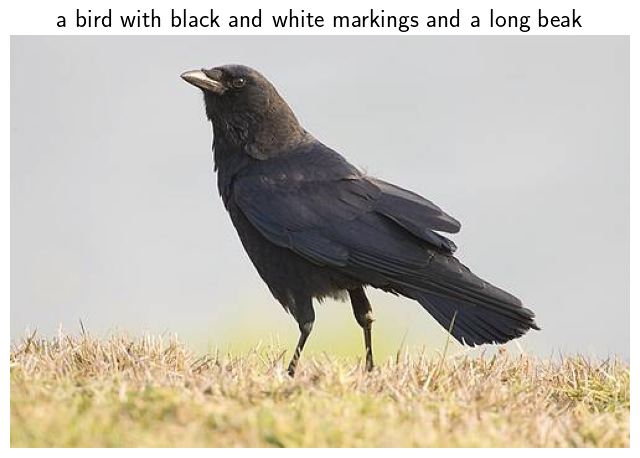

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
path = '../dataset/val/American_Crow_0014_25287.jpg'
image = Image.open(path)
ax.imshow(image)
ax.axis('off')
ax.set_title(generate_prompt(path))
plt.show()

a bird with a white and black striped tail
